In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<h1 style="font-family: 'Poppins', sans-serif; color: #343f56; text-align: center; font-weight:600; font-size: 38px;">Heart Attack Analysis and Predictions<h1>

<h4 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:600; font-size: 23px;">Content<h4>

<a style="font-family: 'Poppins', sans-serif; text-align: left; font-weight:300; font-size: 16px;" href='#section1'>1. Introduction</a><br>
<a style="font-family: 'Poppins', sans-serif; text-align: left; font-weight:300; font-size: 16px;" href='#section2'>2. Exploratory Data Analysis</a><br>
<a style="font-family: 'Poppins', sans-serif; text-align: left; font-weight:300; font-size: 16px;" href='#section3'>3. Data Preprocessing and Building Models</a><br>
<a style="font-family: 'Poppins', sans-serif; text-align: left; font-weight:300; font-size: 16px;" href='#section4'>4. Results</a>

<a id="section1"></a>
<h4 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:600; font-size: 23px;">Introduction<h4>
    
<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">A Heart Attack occurs when the heart muscles don't receive enough oxygen due to a blockage in one or more coronary arteries. These blockages are basically plaque buildup which consists of fats, cholestrol, etc. The heart muscle which has lost the blood supply eventually dies and this condition is very dangerous and fatal.<p>

<h4 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:600; font-size: 23px;">About the Dataset<h4>
    
<p style="font-family: 'Poppins', sans-serif; font-weight:300; font-size: 16px">
1. Age : Age of the patient<br>
2. Sex : Sex of the patient<br>
3. exang: exercise induced angina (1 = yes; 0 = no)<br>
4. ca: number of major vessels (0-3)<br><br>
5. cp : Chest Pain type chest pain type<br><br>
Value 0: typical angina<br>
Value 1: atypical angina<br>
Value 2: non-anginal pain<br>
Value 3: asymptomatic<br><br>
6. trtbps : resting blood pressure (in mm Hg)<br>
7. chol : cholestoral in mg/dl fetched via BMI sensor<br>
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br><br>
9. rest_ecg : resting electrocardiographic results<br><br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br><br>
10. thalach : maximum heart rate achieved<br>
11. target : 0= less chance of heart attack 1= more chance of heart attack<br>
12. thall: Thalium Stress Test result ~ (0,3)<br>
13. slp: Slope</p>

<h4 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:600; font-size: 23px;">Description about some of these attributes.<h4>
    
<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">1. Exang: Exercise induced angina or Angina feels like a pressure in the chest. Angina is a common complaint of cardiac patients.<br><br>
2. cp: Chest Pain.</p>
    
<ul style="font-family: 'Poppins', sans-serif; text-align: left; font-weight:300; font-size: 16px;"><li> Typical Angina: Typical angina is used to describe symptoms in men.</li>
<li>Atypical angina: It is associated with symptoms common to women.</li>
<li> Non anginal pain: It is related to a problem with the oesophagus, such as gastroesophageal reflux disease and its often not related to conditions of heart.</li>
<li>Asymptomatic: No symptoms were seen in the patient.</li></ul>
    
<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">3. chol: Total Cholestrol should be below 200mg/dL in a healthy person. High cholesterol can limit blood flow, increasing the risk of a heart attack or stroke. </p>
    
<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">4. rest_ecg: Resting Electrocardigraph Results</p>
 <ul style="font-family: 'Poppins', sans-serif; text-align: left; font-weight:300; font-size: 16px;"><li>Normal</li>
<li>ST-T wave abnormality: An ST-T abnormality on an electrocardiogram (ECG) is known to independently predict subsequent morbidity and mortality from cardiovascular diseases.</li>
<li>Left ventricular hypertrophy: Left ventricular hypertrophy is a thickening of the wall of the heart's main pumping chamber. This thickening may result in elevation of pressure within the heart and sometimes poor pumping action.</li>
</ul>

<a id="section2"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #fc5404; text-align: left; font-weight:600;">1. Exploratory Data Analysis<h1>

In [2]:
#Importing needed libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset as df
df= pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">The output column is our target column.</p>

In [5]:
df.shape

(303, 14)

In [6]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">We observe that there is one duplicate row in our data set. So lets drop this row!</p>

In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">Let's divide the dataset into numerical and categorical columns.</p>

In [8]:
numerical_cols = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'caa', 'fbs', 'restecg', 'exng', 'slp', 'thall']
target = ['output']

<h2 style="font-family: 'Poppins', sans-serif; color: #2541b2; text-align: left; font-weight:600; font-size: 22px; background-color: #ffed99; padding: 10px; border-radius:5px;">1.1 Univariate Analysis<h2>

Text(0.5, 1.0, 'Countplot of People with less or more chance of heart attack')

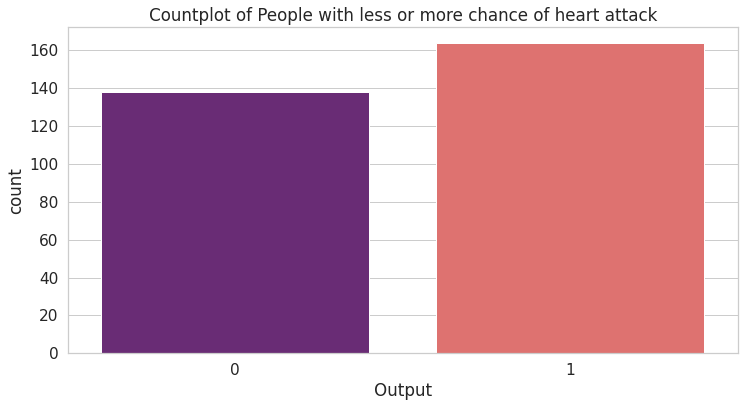

In [9]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
sns.countplot(x='output', data=df, palette='magma').set(xlabel="Output")
plt.title("Countplot of People with less or more chance of heart attack")

In [10]:
print("Number of people with more chance of heart attack:", df[df["output"]==1].value_counts().sum())
print("Number of people with less chance of heart attack:",df[df["output"]==0].value_counts().sum())

Number of people with more chance of heart attack: 164
Number of people with less chance of heart attack: 138


<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:500">54.3% of the total people have more chance of heart attack<br>45.7% people have less chance of a heart attack.</p>

Text(0.5, 1.0, 'Countplot of Sex')

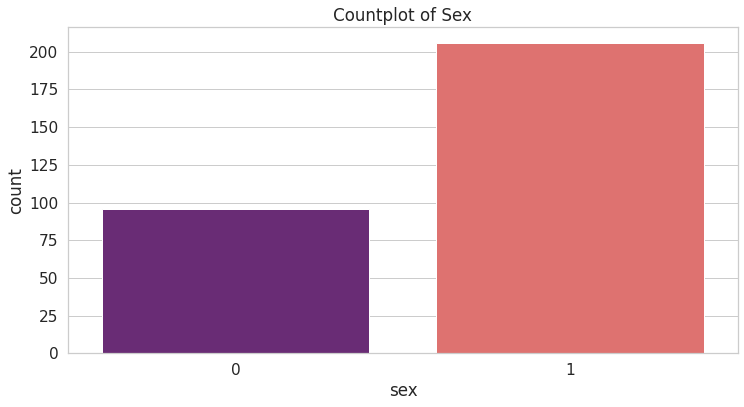

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='sex', data=df, palette='magma')
plt.title("Countplot of Sex")

In [12]:
print("Number of people with sex labelled as 1:", df[df["sex"]==1].value_counts().sum())
print("Number of people with sex labelled as 0:",df[df["sex"]==0].value_counts().sum())

Number of people with sex labelled as 1: 206
Number of people with sex labelled as 0: 96


<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:500">68.2% belong to the sex = 1<br>31.7% belong to the sex = 0</p>

### **Categorical Features**

[Text(0.5, 1.0, 'Thallium Stress Test')]

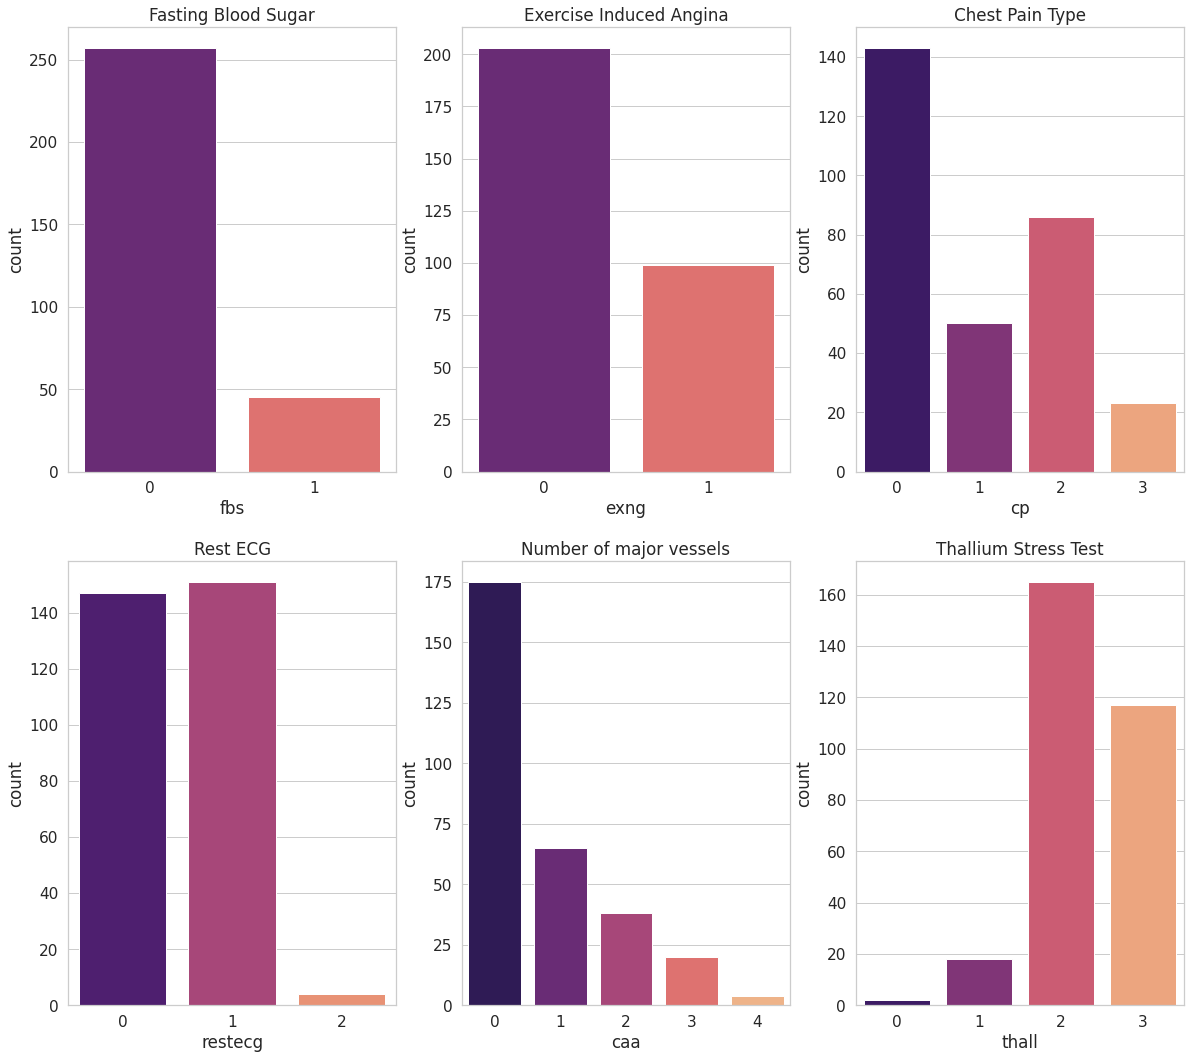

In [13]:
fig, ax = plt.subplots(2,3, figsize=(20,18))
sns.countplot(x='fbs', data=df, palette='magma', ax=ax[0][0]).set(title='Fasting Blood Sugar')
sns.countplot(x='exng', data=df, palette='magma', ax=ax[0][1]).set(title='Exercise Induced Angina')
sns.countplot(x='restecg', data=df, palette='magma', ax=ax[1][0]).set(title='Rest ECG')
sns.countplot(x='cp', data=df, palette='magma', ax=ax[0][2]).set(title='Chest Pain Type')
sns.countplot(x='caa', data=df, palette='magma', ax=ax[1][1]).set(title='Number of major vessels')
sns.countplot(x='thall', data=df, palette='magma', ax=ax[1][2]).set(title='Thallium Stress Test')

#### **Interpretations from the above graphs with categorical features.**
<ul style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400"><li>More than <b>32%</b> of the people have Exercise Induced Angina</li>
<li><b>47%</b> of the people have Typical Angina or Chest Pain Type 1 and <b>28%</b> have Non Anginal Pain.</li>
<li><b>48%</b> of the people have Normal Rest ECG while <b>50%</b> of the people have ST-T wave abnormality.</li>
<li>More than <b>54%</b> of the people have Thalium Stress test value of 2</li></ul>

### **Numerical Features**

[Text(0.5, 1.0, 'Maximum Heart Rate Achieved')]

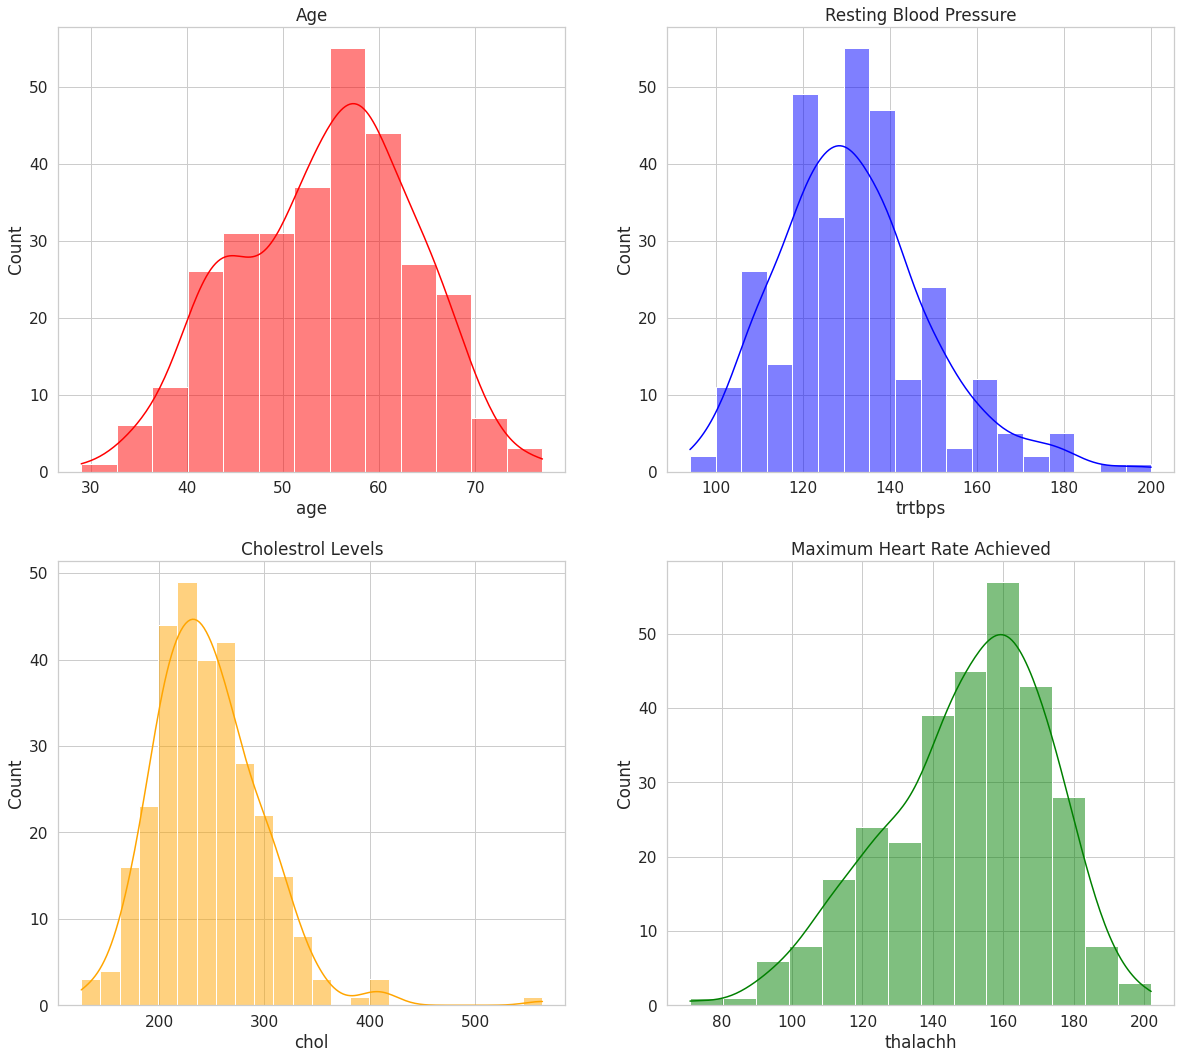

In [14]:
fig, ax = plt.subplots(2,2, figsize=(20,18))
sns.histplot(x=df["age"], ax=ax[0][0], color="red", kde=True).set(title='Age')
sns.histplot(x=df["trtbps"], ax=ax[0][1], color="blue", kde=True).set(title='Resting Blood Pressure')
sns.histplot(x=df["chol"], ax=ax[1][0], color="orange", kde=True).set(title='Cholestrol Levels')
sns.histplot(x=df["thalachh"], ax=ax[1][1], color="green", kde=True).set(title='Maximum Heart Rate Achieved')

#### **Interpretations from above graph with Numerical Features.**
<ul style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400;">
    <li>Most of the people in this dataset have an age between 40 and 70.</li>
    <li>There are a large number of people who have blood pressure in the range of 120 and 150.<br> <b>90/60mmHg-120/80mmHg</b> is considered as the ideal blood pressure for a healthy person. High blood pressure is considered to be <b>140/90mmHg</b> or higher.</li>
    <li>Many people who have cholestrol levels in the range of 200-300mg/dL. Total cholesterol levels less than <b>200 milligrams per deciliter (mg/dL)</b> are considered desirable for adults.</li>
    <li>Many people have Max Heart Rate in the range of <b>140 and 160 bpms</b>.According to American Heart Association the Maximum Heart Rate is around 220 beats per minute (bpm) minus the person's age.</li>
</ul>

<h2 style="font-family: 'Poppins', sans-serif; color: #2541b2; text-align: left; font-weight:600; font-size: 22px; background-color: #ffed99; padding: 10px; border-radius:5px;">1.2 Multivariate Analysis<h2>

<AxesSubplot:>

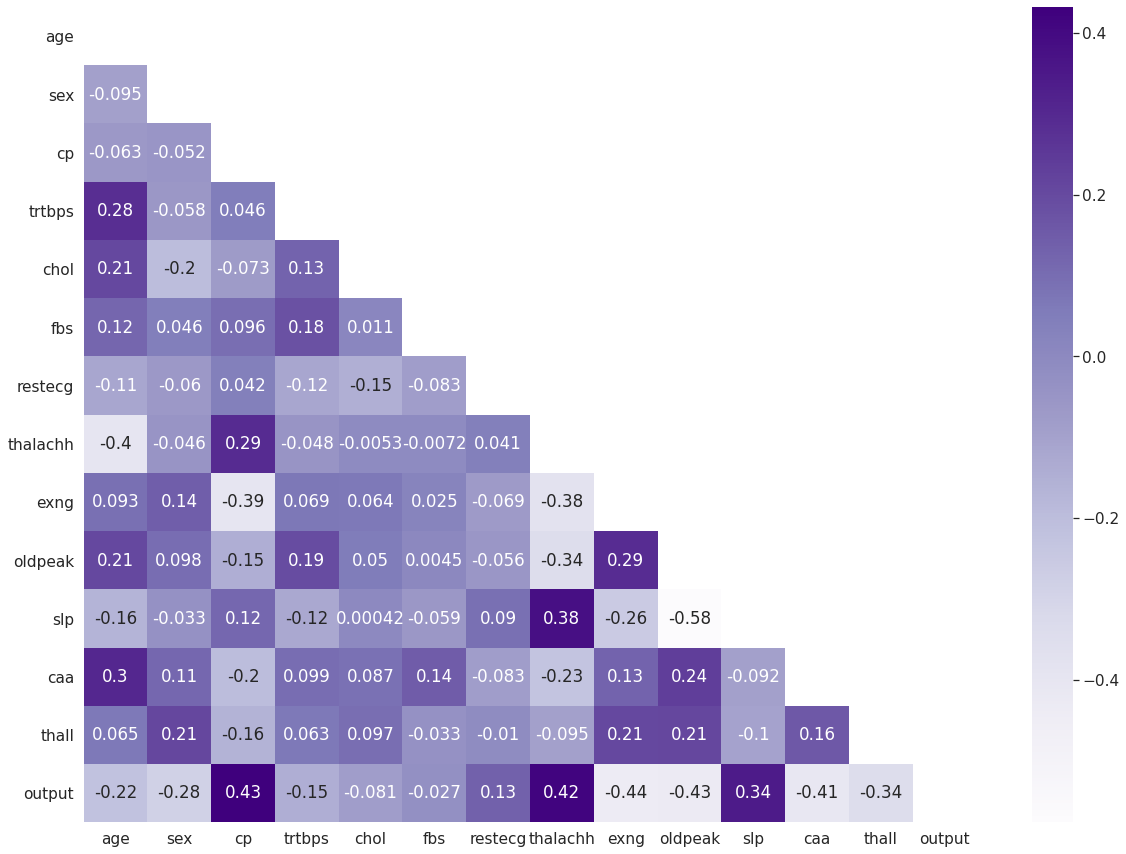

In [15]:
plt.figure(figsize=(20,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap="Purples", mask=matrix)

### **Output related to different attributes**

[Text(0.5, 1.0, 'Heart Attack related to Blood Pressure')]

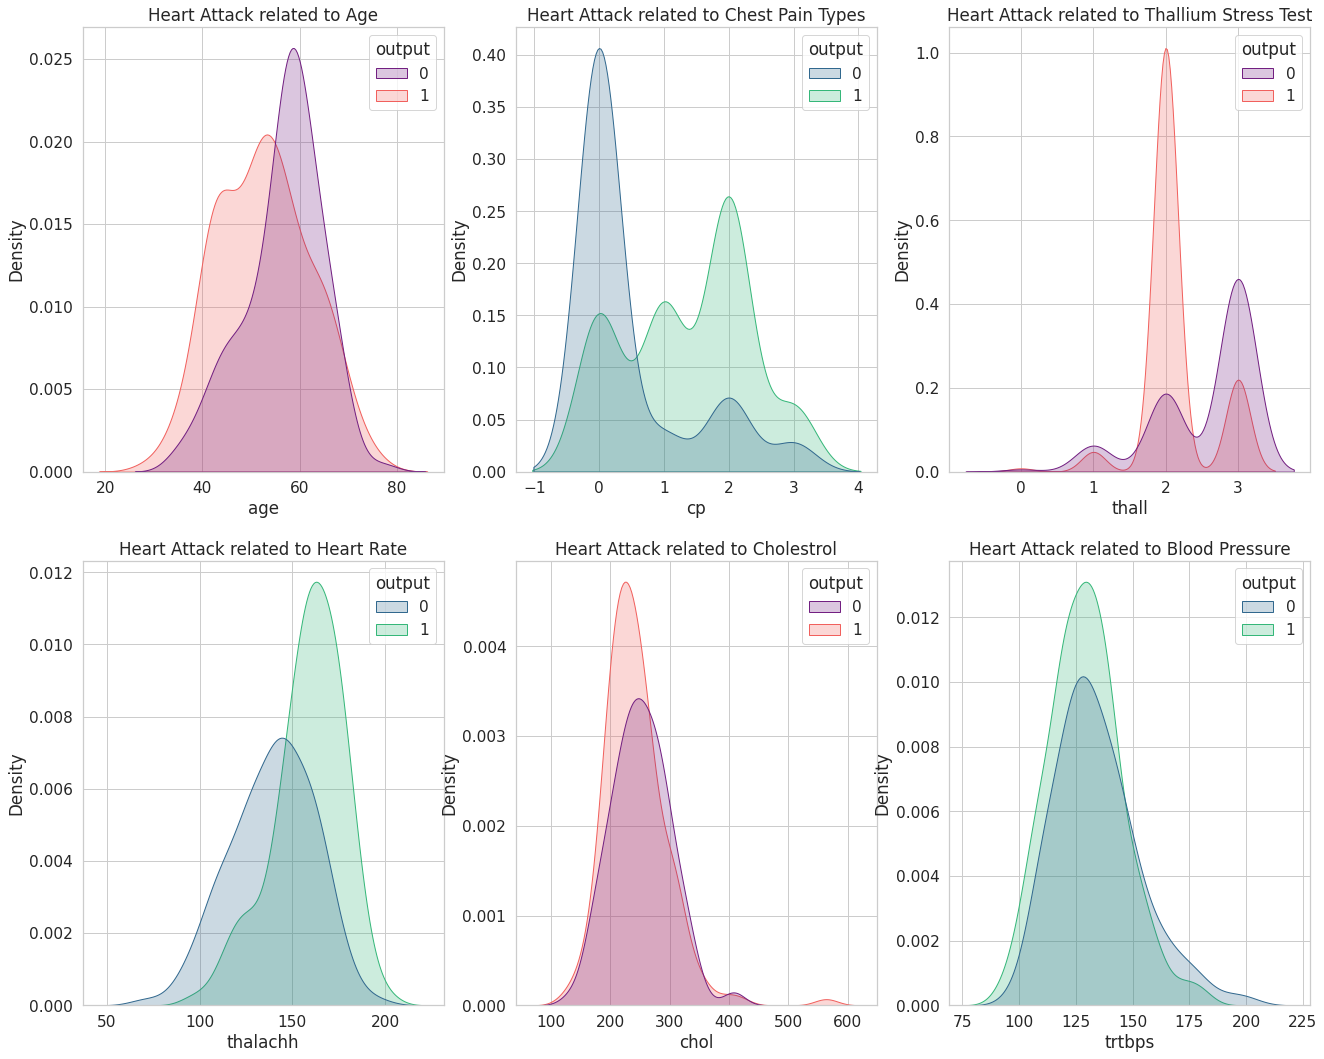

In [16]:
fig, ax = plt.subplots(2,3, figsize=(22,18))
sns.kdeplot(x="age", data=df, hue="output", ax=ax[0][0], fill="True", palette="magma").set(title="Heart Attack related to Age")
sns.kdeplot(x="cp", data=df, hue="output", ax=ax[0][1], fill="True", palette="viridis").set(title="Heart Attack related to Chest Pain Types")
sns.kdeplot(x="thalachh", data=df, hue="output", ax=ax[1][0], fill="True", palette="viridis").set(title="Heart Attack related to Heart Rate")
sns.kdeplot(x="chol", data=df, hue="output", ax=ax[1][1], fill="True", palette="magma").set(title="Heart Attack related to Cholestrol")
sns.kdeplot(x="thall", data=df, hue="output", ax=ax[0][2], fill="True", palette="magma").set(title="Heart Attack related to Thallium Stress Test")
sns.kdeplot(x="trtbps", data=df, hue="output", ax=ax[1][2], fill="True", palette="viridis").set(title="Heart Attack related to Blood Pressure")

#### **Interpretations from the above KDE plots.**
<ul style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400;">
    <li>Most people that suffer heart attacks lie in the age of 40-60 Years</li>
    <li>People that have heart attacks often suffer from Non Anginal Pain or Type 2 Chest Pain.</li>
    <li>Large number of people who suffer heart attacks have Max heart rates between 140-180</li>
    <li>People with Cholestrol Levels higher than 200mg/dL tend to have heart attacks more.</li>
    <li>Heart Attacks were seen in people with Thallium Stress Text value of 2</li><ul>

<h2 style="font-family: 'Poppins', sans-serif; color: #2541b2; text-align: left; font-weight:600; font-size: 22px; background-color: #ffed99; padding: 10px; border-radius:5px;">1.3 Some other relations<h2>

[Text(0.5, 1.0, 'Chest Pain Type vs Age')]

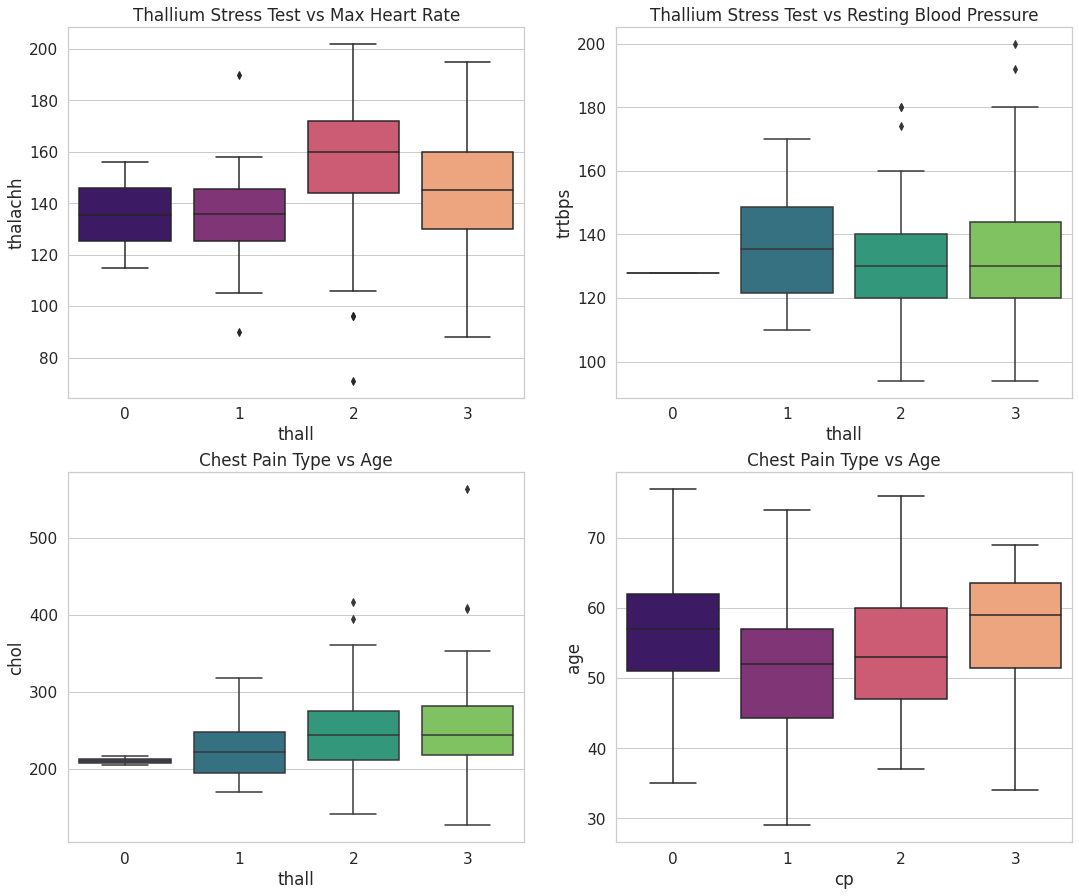

In [17]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))
sns.boxplot(x="thall", y="thalachh", data=df, palette="magma", ax=ax[0][0]).set(title="Thallium Stress Test vs Max Heart Rate")
sns.boxplot(x="thall", y="trtbps", data=df, palette="viridis", ax=ax[0][1]).set(title="Thallium Stress Test vs Resting Blood Pressure")
sns.boxplot(x="thall", y="chol", data=df, palette="viridis", ax=ax[1][0]).set(title="Chest Pain Type vs Age")
sns.boxplot(x="cp", y="age", data=df, palette="magma", ax=ax[1][1]).set(title="Chest Pain Type vs Age")


#### **Interpretations from the above  boxplots.**
<ul style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400;">
    <li>There are significant outliers in the categorical data.</li>
    <li>A significant number of people with Thallium Stress Test Value of 2 have higher Max Heart Rates.</li>
    <li>Some people with Thallium Stress Test Value of 1 have higher Resting Blood Pressure.</li>
    <li>People with Thallium Stress Test values off 2 and 3 tend to have higher cholestrol levels.</li>
    <li>People with age of more than 50 years tend to have Anginal Pains. </li>

<a id="section3"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #fc5404; text-align: left; font-weight:600;">2. Data Preprocessing and Building Models<h1>

In [18]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h2 style="font-family: 'Poppins', sans-serif; color: #2541b2; text-align: left; font-weight:600; font-size: 22px; background-color: #ffed99; padding: 10px; border-radius:5px;">2.1 Data Preprocessing<h2>

In [19]:
# Splitting the data into Train and Test Data.
from sklearn.model_selection import train_test_split
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (211, 13)
Shape of test set: (91, 13)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<h2 style="font-family: 'Poppins', sans-serif; color: #2541b2; text-align: left; font-weight:600; font-size: 22px; background-color: #ffed99; padding: 10px; border-radius:5px;">2.2 Classification Models<h2>

<h2 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:500; font-size: 20px;">2.2.1 Logistic Regression</h2>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train, y_train)
predictions1 = logmodel.predict(X_test)

In [24]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[33  9]
 [ 5 44]]


              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.83      0.90      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [25]:
logmodel_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logmodel_acc)

Accuracy of the Logistic Regression Model is:  0.8461538461538461


<h2 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:500; font-size: 20px;">2.2.2 K Nearest Neighbours</h2>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[30 12]
 [ 7 42]]


              precision    recall  f1-score   support

           0       0.81      0.71      0.76        42
           1       0.78      0.86      0.82        49

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400">Since the accuracy is low, I'll try to find the best K values or n_neighbours value by plotting a graph between error rate and K value.</p>

In [29]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

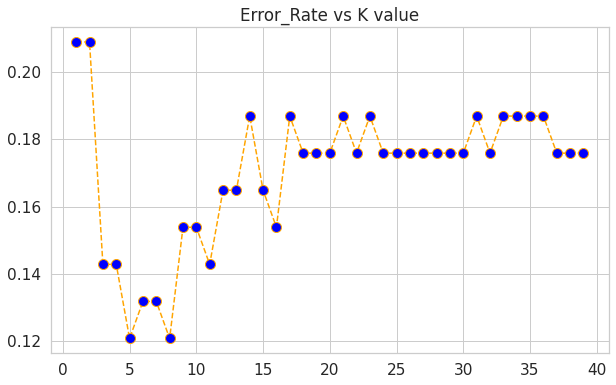

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='orange', linestyle="--",marker='o', markersize=10, markerfacecolor='blue')
plt.title('Error_Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400">K value of 5 and 8 shows the least error. So I'll replace n_neighbours and check accuracy again.</p>

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[36  6]
 [ 5 44]]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.88      0.90      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400">As you can see the accuracy increased significantly from 79% to 88%.</p>

In [33]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.8791208791208791


<h2 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:500; font-size: 20px;">2.2.3 Random Forest</h2>

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions3 = rfc.predict(X_test)

In [36]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions3))
print("\n")
print(classification_report(y_test, predictions3))

Confusion Matrix: 
 [[35  7]
 [ 7 42]]


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.86      0.86      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [37]:
rfc_acc = accuracy_score(y_test, predictions3)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.8461538461538461


<h2 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:500; font-size: 20px;">2.2.4 Support Vector Machines (SVM)</h2>

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions4 = svc_model.predict(X_test)

In [40]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[31 11]
 [ 7 42]]


              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.79      0.86      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400">As you can see the accuracy is low. So I'll try to increase it by using Grid Search CV</p>

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [43]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [44]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [45]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [46]:
grid_predictions = grid.predict(X_test)

In [47]:
print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

Confusion Matrix: 
 [[33  9]
 [ 4 45]]


              precision    recall  f1-score   support

           0       0.89      0.79      0.84        42
           1       0.83      0.92      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:400">So using Grid Search CV we brought the accuracy to around 86%.</p>

In [48]:
svm_acc = accuracy_score(y_test, grid_predictions)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.8571428571428571


<h2 style="font-family: 'Poppins', sans-serif; color: #f54748; text-align: left; font-weight:500; font-size: 20px;">2.2.5 Naive Bayes</h2>

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
naive = GaussianNB()
naive.fit(X_train, y_train)
predictions5 = naive.predict(X_test)

In [51]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[35  7]
 [ 6 43]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.86      0.88      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [52]:
nb_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", nb_acc)

Accuracy of SVM model is:  0.8571428571428571


<a id="section4"></a>
<h1 style="font-family: 'Poppins', sans-serif; color: #fc5404; text-align: left; font-weight:600;">3. Results<h1>

In [53]:
print("Accuracy of Logistic Regression Model is: ",logmodel_acc*100,"%")
print("Accuracy of K Nearest Neighbour Model is: ",knn_model_acc*100,"%")
print("Accuracy of Random Forests Model is: ",rfc_acc*100,"%")
print("Accuracy of SVM Model is: ",svm_acc*100,"%")
print("Accuracy of Naive Bayes Model is: ",nb_acc*100,"%")

Accuracy of Logistic Regression Model is:  84.61538461538461 %
Accuracy of K Nearest Neighbour Model is:  87.91208791208791 %
Accuracy of Random Forests Model is:  84.61538461538461 %
Accuracy of SVM Model is:  85.71428571428571 %
Accuracy of Naive Bayes Model is:  85.71428571428571 %


<AxesSubplot:>

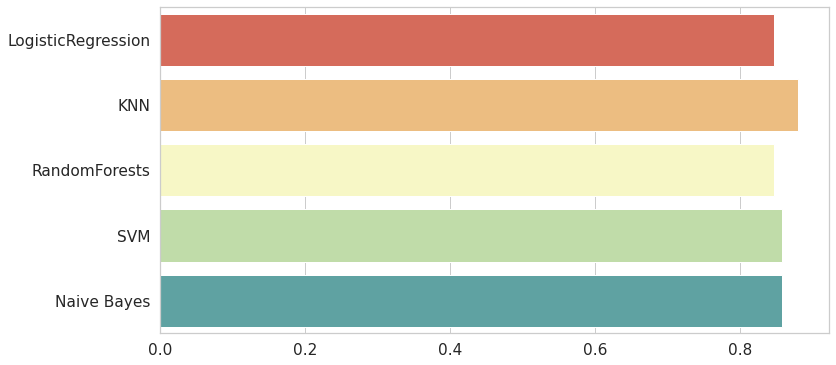

In [54]:
plt.figure(figsize=(12,6))
model_acc = [logmodel_acc, knn_model_acc, rfc_acc, svm_acc, nb_acc]
name_of_model = ['LogisticRegression', 'KNN', 'RandomForests', 'SVM', 'Naive Bayes']
sns.barplot(x= model_acc, y=name_of_model, palette='Spectral')

<h1 style="font-family: 'Poppins', sans-serif; color: #343f56; text-align: center; font-weight:600; font-size: 24px;">KNN has the highest accuracy with 87.91% accuracy score!<h1>

<h2 style="font-family: 'Poppins', sans-serif; color: #fff; text-align: center; font-weight:600; font-size: 22px; background-color: #1a1a1d; padding: 10px; border-radius:5px;">If you find this notebook helpful, Please do leave an UPVOTE!<h2>